In [10]:
'''Point Cloud Raw Visualization'''
from open3d import *

pcd_load = read_point_cloud("/home/johan/Desktop/Jackal/Files/Classification/PCDPointsW/Dense/densifi5.pcd")
draw_geometries([pcd_load])

In [21]:
from skimage.segmentation import slic
from segraph import create_graph
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import cv2

image = plt.imread("/home/johan/Desktop/Jackal/Files/Classification/img684.png")

print 'image shape\n', image.shape
segments = slic(image, n_segments = 1000, enforce_connectivity = True)
#segments are groups of region which was divided according to the color pixeles

#np.savetxt('segments'+'.csv', segments, delimiter=',')
#vetices are the nodes
# Create graph of superpixels
vertices, edges = create_graph(segments)
print 'vertices:\n',vertices.shape, type(vertices)
#print('vertices',vertices)

# Compute centers:
gridx, gridy = np.mgrid[:segments.shape[0], :segments.shape[1]]
centers = dict()
for v in vertices:
    centers[v] = [round(gridy[segments == v].mean()), round(gridx[segments == v].mean())]

image shape
(720, 1280, 3)
Creating a graph using segmented grid..
vertices:
(929,) <type 'numpy.ndarray'>


<Figure size 432x288 with 0 Axes>

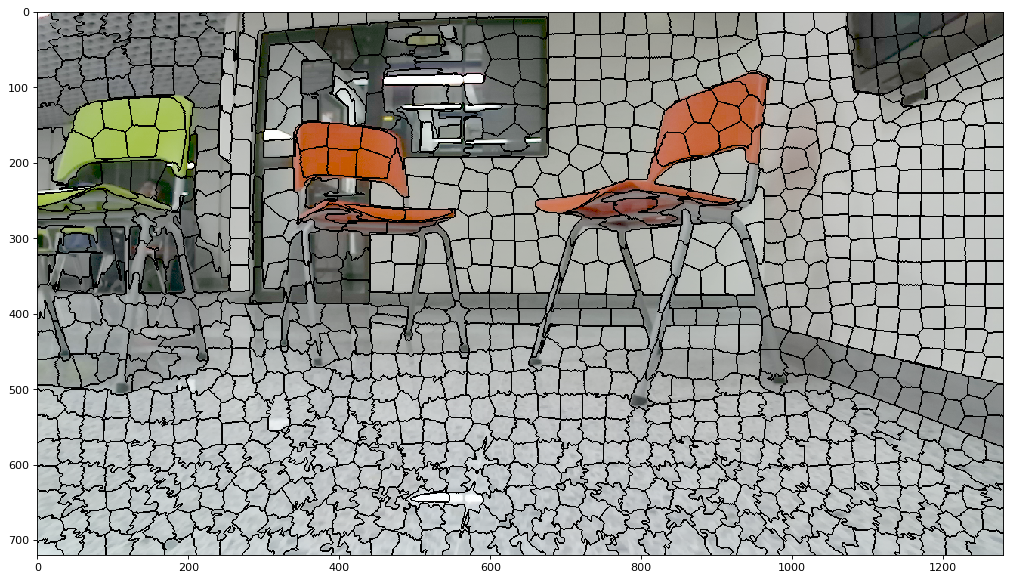

In [41]:
from skimage import exposure
#f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
plt.figure(4)
plt.figure(figsize=(18, 9), dpi=80)
mgplot = plt.imshow(img)
img = image
gamma_corrected = exposure.adjust_gamma(img, 0.4)
plt.imshow(mark_boundaries(gamma_corrected , segments,color=(0, 0, 0)))
#ax2.imshow(mark_boundaries(gamma_corrected , segments,color=(0, 0, 0)))

plt.savefig('plot.png')
